# Подготовка всего необходимого

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
PRETTY_NAMES = {'dijkstra': 'Dijkstra',
                'floyd_warshall': 'Floyd-Warshall',
                'ford_bellman': 'Ford-Bellman'}

GRAPH_TYPES = {'complete_graph': 'Complete Graph',
               'medium-density_graph': 'Medium-density Graph',
               'spanning_tree': 'Spanning Tree'}

COLORS = {'dijkstra': 'red', 'floyd_warshall': 'blue', 'ford_bellman': 'green',
          'complete_graph': 'red', 'medium-density_graph': 'blue', 'spanning_tree': 'green'}

VERTICES_AMOUNT = range(10, 1011, 50)

In [3]:
algorithms = {algorithm : pd.read_csv(f'../Measurements/{algorithm}.csv', sep=';') for algorithm in PRETTY_NAMES.keys()}
graph_types = {graph_type : pd.read_csv(f'../Measurements/{graph_type}.csv', sep=';') for graph_type in GRAPH_TYPES.keys()}

# Сравнения по алгоритмам

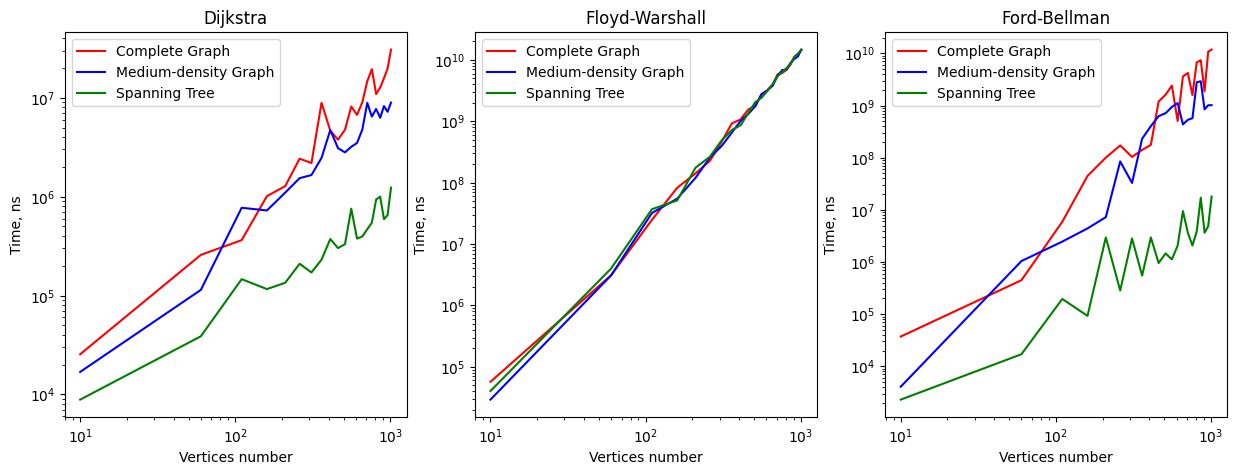

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, algorithm in enumerate(PRETTY_NAMES.keys()):
    axs[i].set_title(PRETTY_NAMES[algorithm])
    axs[i].set_xlabel('Vertices number')
    axs[i].set_ylabel('Time, ns')
    for graph_type in GRAPH_TYPES.keys():
        axs[i].loglog(VERTICES_AMOUNT, algorithms[algorithm][GRAPH_TYPES[graph_type]], color=COLORS[graph_type], label=GRAPH_TYPES[graph_type])
    axs[i].legend()
    pass

Асимптотика алгоритма Дейкстры в представленной реализации: $O(|E|log|V|)$, поэтому он ожидаемо работает лучше всего на тех графах, где меньше всего рёбер, то есть на остове, затем на средне-плотном графе и хуже всего на полном графе.

Асимптотика алгоритма Флойда-Уоршелла: $\Theta(|V|^3)$, то есть он не зависит от количества рёбер, поэтому и видим три сливающиеся линии.

Асимптотика алгоритма Форда-Беллмана: $O(|E||V|)$, значит, в нашем случае разница между полным графом и средне-плотным должна быть в 2-2,5 раза, что примерно и достигается при достаточно большой мощности множества вершин. Для остовного дерева $|E| = |V| - 1$, поэтому видим квадратичную зависимость.

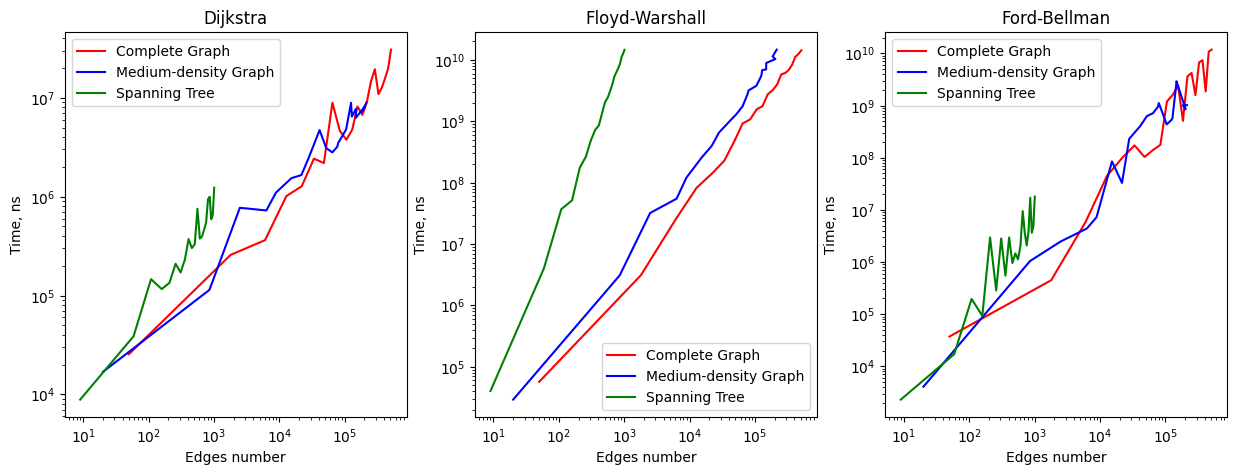

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, algorithm in enumerate(PRETTY_NAMES.keys()):
    axs[i].set_title(PRETTY_NAMES[algorithm])
    axs[i].set_xlabel('Edges number')
    axs[i].set_ylabel('Time, ns')

    for graph_type in GRAPH_TYPES.keys():
        axs[i].loglog(algorithms[algorithm][GRAPH_TYPES[graph_type] + ' Edges'], algorithms[algorithm][GRAPH_TYPES[graph_type]], color=COLORS[graph_type], label=GRAPH_TYPES[graph_type])
    axs[i].legend()
    pass

<!-- В нашем случае увеличение количества рёбер означает переход к большему графу (сами графы после создания мы никак не меняем), поэтому можно попытаться проанализировать каждую отдельную линию на графиках. -->

В принципе, графики ожидаемые, для Дейкстры - чем больше рёбер, тем больше время работы, при этом для остова время наименьшее из всех, так как в нём очень мало и вершин, и рёбер, далее средне-плотный граф. Зелёный график находится выше всех потому, что при одинаком количестве рёбер, остов будет содержать наибольшее количество вершин, и, следовательно, большее время работы.

В случае с Флойдом-Уоршеллом график выглядит чуть сложнее, выглядит так, как будто для дерева асимптотика хуже, хотя на самом деле $10^3$ ребёр для остова означает примерно столько же вершин, а $10^3$ для других типов графов это числа на порядки ниже -- в общем, можно сделать такой же вывод, как и на графиках с вершинами -- зависит только от количества вершин.

На третьем графике наблюдается та же проблема с графиком для дерева, что и на двух других, она уже объяснена. Синий и красный графики находятся очень близко, но в большинстве точек синий всё же выше, как при одном и том же количестве рёбер в средне-плотном графе будет больше вершин, чем в плотном графе, поэтому и время работы будет выше.

# Сравнения по типам графа

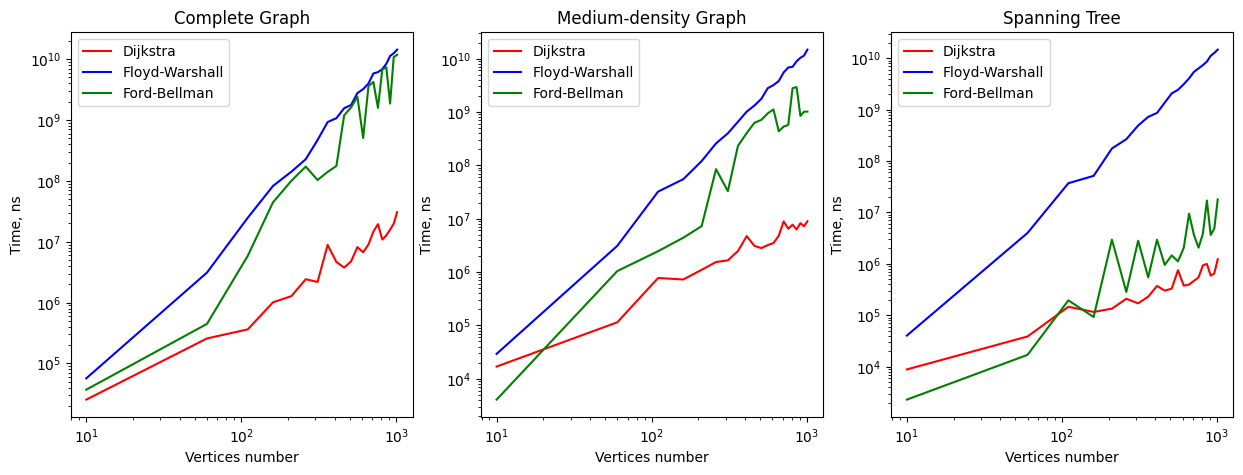

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, graph_type in enumerate(GRAPH_TYPES.keys()):
    axs[i].set_title(GRAPH_TYPES[graph_type])
    axs[i].set_xlabel('Vertices number')
    axs[i].set_ylabel('Time, ns')
    for algorithm in PRETTY_NAMES.keys():
        axs[i].loglog(VERTICES_AMOUNT, graph_types[graph_type][algorithm], color=COLORS[algorithm], label=PRETTY_NAMES[algorithm])

    axs[i].legend()
    pass

Флойд-Уоршелл работает одинаково на всех графах, а вот Форд-Беллман с уменьшением количества рёбер в графе, работает всё лучше и лучше и на остове сопоставим с алгоритмом Дейкстры.

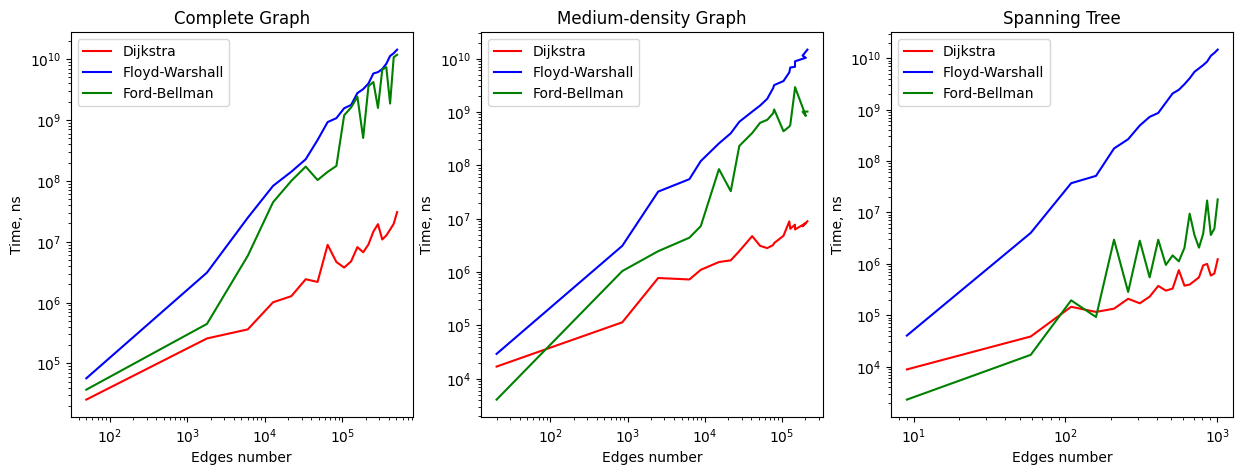

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for i, graph_type in enumerate(GRAPH_TYPES.keys()):
    axs[i].set_title(GRAPH_TYPES[graph_type])
    axs[i].set_xlabel('Edges number')
    axs[i].set_ylabel('Time, ns')
    for algorithm in PRETTY_NAMES.keys():
        axs[i].loglog(graph_types[graph_type]['Edges'], graph_types[graph_type][algorithm], color=COLORS[algorithm], label=PRETTY_NAMES[algorithm])
    axs[i].legend()
    pass

Наблюдаем графики, очень похожие на графики выше. Везде дольше всех работает алгоритм Флойда-Уоршелла, так как зависит только от количества вершин, а вот два других всё так же конкурируют между собой, но выигрывает всё же Дейкстра, как количество вершин входит в его асимтотику под логарифмом.

# Общий вывод

Сравнить алгоритмы Форда-Беллмана и Дейкстры просто, так как они выполняют одну задачу -- алгоритм Дейкстры асимптотически лучше, из-за того, что можно написать алгоритм так, чтобы их асимптотики были похожи, но количество вершин входило под логарифмом.

На первый взгляд, алгоритм Флойда-Уоршелла показал себя хуже всех, однако здесь следует помнить, что он выполняет более общую задачу - ищет кратчайшие расстояния между всеми парами вершин в графе, а не между начальной и всеми остальными.

Попробуем оценить, когда его использование оправдано, сравнив с алгоритмом Дейкстры, для этого нужно чтобы (для простоты константы в асимптотиках опустим): $$|V|^3 \le n*|E|log_2(|V|)$$ или $$n \ge \frac{|V|^3}{|E|log_2|V|}$$

Выразим $|E|$ через $|V|$: $|E| = \delta\frac{|V|(|V| - 1)}{2}$, где $\delta$ - коэффициент плотности.

Тогда итоговая формула: $$n \ge \frac{2|V|^2}{\delta(|V| - 1)log_2|V|}$$

При этом количество запросов n не должно превышать количество пар в графе, равное $\frac{n(n - 1)}{2}$.
Построим графики для разных коэффициентов плотности:

Для полного графа:

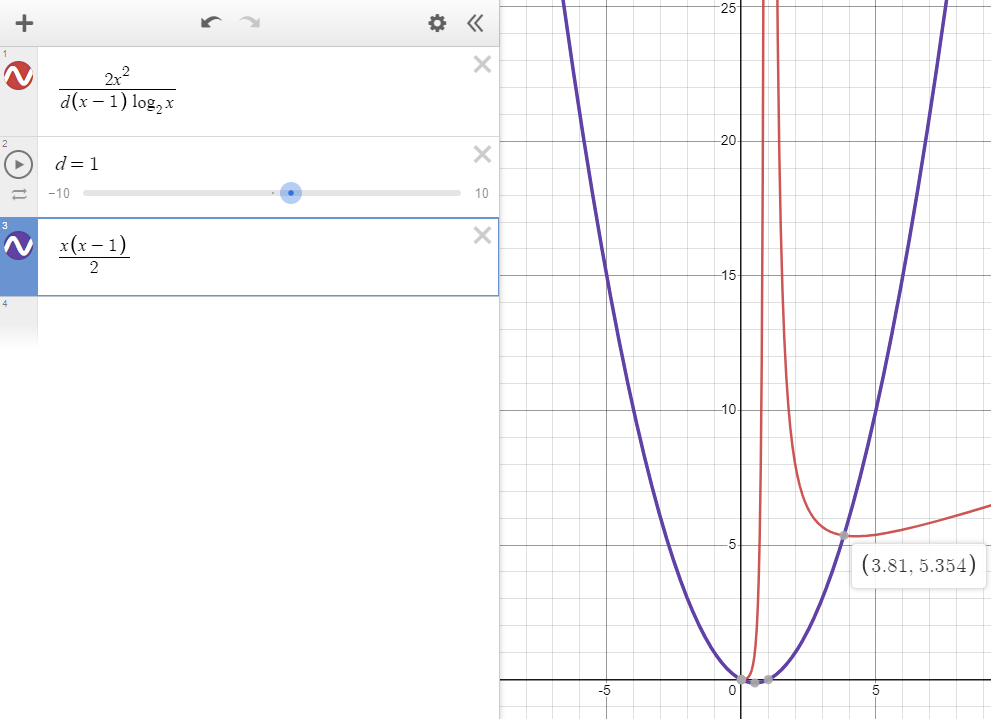


Для коэффициентов 0.4 и 0.5:

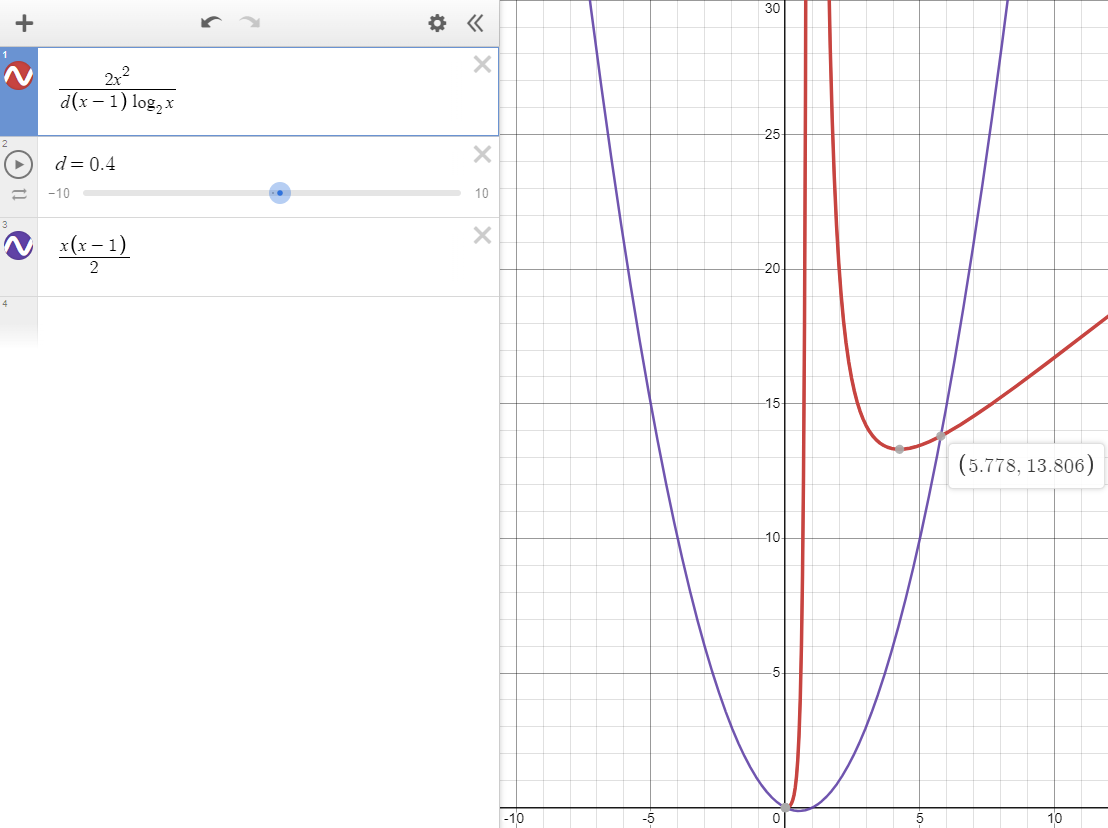

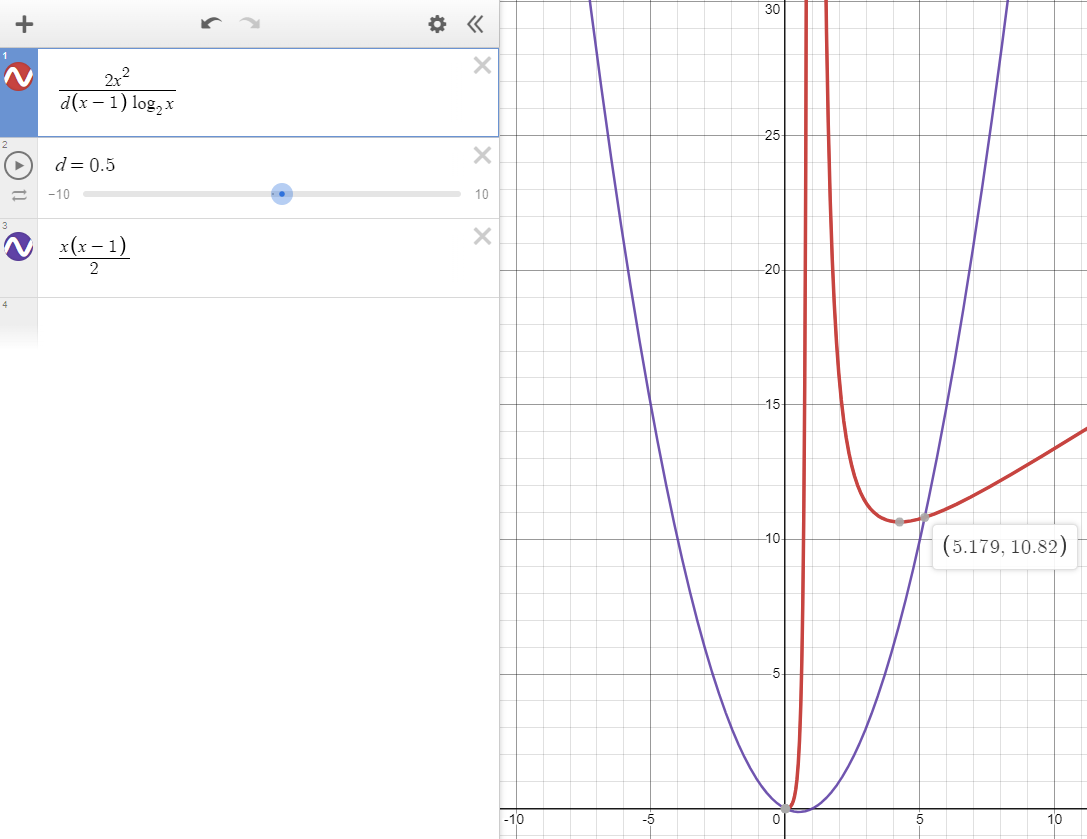

Для остовного дерева:

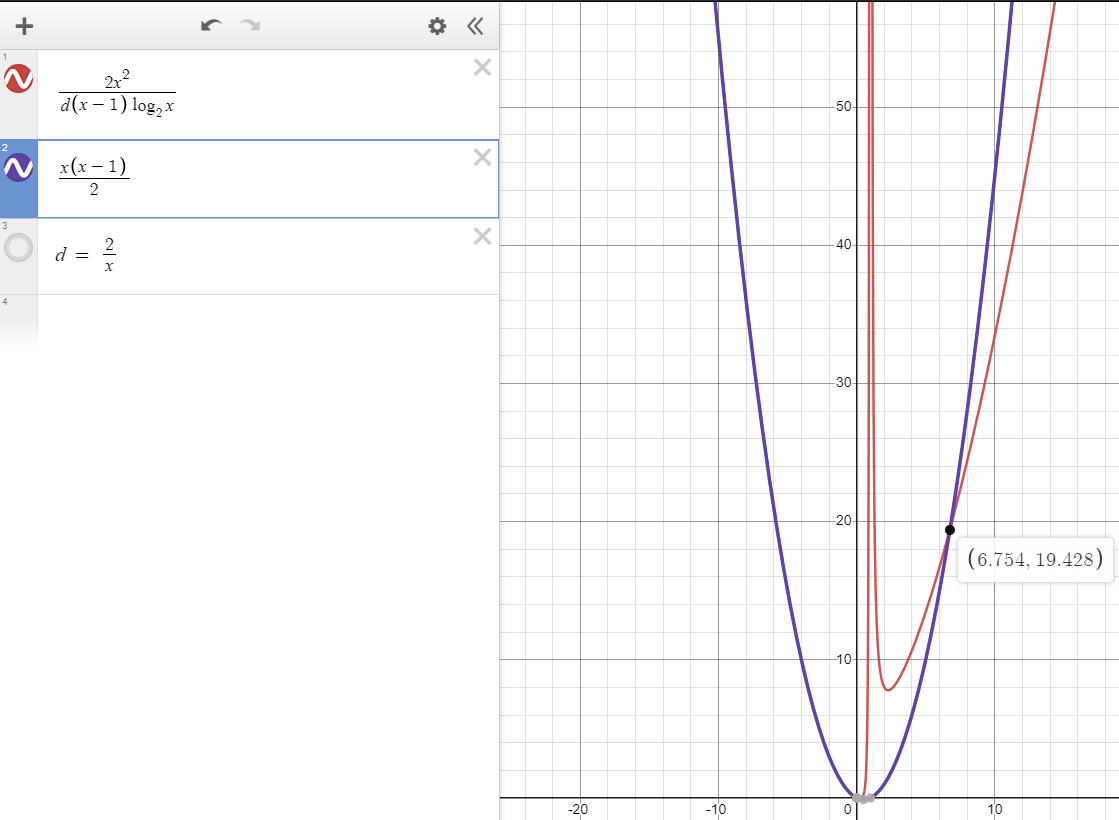

Графики интерпретировать так: например, имеем полный граф на $10$ вершинах и хотим сделать $20$ запросов на получение расстояния между парой различных точек, тогда смотрим на соответствующий график - $20$ больше, значение красного графика в точке $10$ и меньше значения фиолетового графика в той же точке, поэтому для такой задачи лучше подойдёт алгоритм Флойда-Уоршелла.

При определённых условиях, алгоритм Флойда-Уоршелла может быть использовать даже для разреженных графов.

Общий вывод таков: если нужно уметь быстро отвечать на запросы на получение расстояние между одной фиксированной точкой и какой-то другой, то лучшим выбором станет алгоритм Дейкстры в текущей реализации или с использованием фибоначчиевых куч, в противном случае - подбирайте параметры в представленных формулах и выбирайте между полным просчётом алгоритмом Флойда-Уоршелла и множественными запросами, используя алгоритм Дейкстры.